In [ ]:
#1
import warnings
warnings.filterwarnings('ignore')



import numpy as np # linear algebra
import pandas as pd #pd.read_csv
import seaborn as sns #
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import KNNImputer




In [ ]:
#2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#3 read data

path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'

df = pd.read_csv(path)
df = df.drop('id', axis=1)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
#5Encoding
label_encoder = LabelEncoder()

en_df = df.copy()  # ทำการคัดลอก DataFrame เพื่อไม่ให้เปลี่ยนแปลง df ต้นฉบับ

en_df['gender'] = label_encoder.fit_transform(en_df['gender'])
en_df['ever_married'] = label_encoder.fit_transform(en_df['ever_married'])
en_df['Residence_type'] = label_encoder.fit_transform(en_df['Residence_type'])
en_df['work_type'] = label_encoder.fit_transform(en_df['work_type'])
en_df['smoking_status'] = label_encoder.fit_transform(en_df['smoking_status'])
en_df['stroke'] = label_encoder.fit_transform(en_df['stroke'])

In [ ]:
#6
en_df['hypertension'] = en_df['hypertension'].astype(int)
en_df['heart_disease'] = en_df['heart_disease'].astype(int)

In [ ]:
#7
en_df.iloc[0:30]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,NaN,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [ ]:
#8 เอาไว้แก้ไข option ในการแสดงข้อมูลเสย ๆ
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**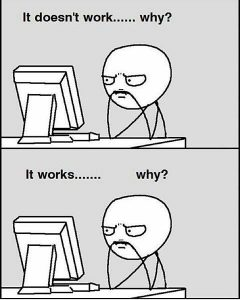**



# EDA


# จำนวนคนเกิด Stroke

In [ ]:
#9 นับจำนวนคนที่มี stroke = 1
stroke_count = df[df['stroke'] == 1].shape[0]

print(f"จำนวนคนที่มี stroke = 1 (เกิด Stroke) มีทั้งหมด {stroke_count} คน")



จำนวนคนที่มี stroke = 1 (เกิด Stroke) มีทั้งหมด 249 คน


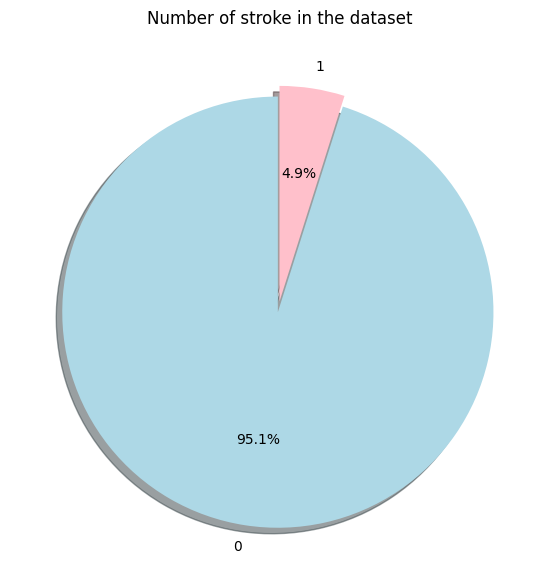

In [ ]:
#10
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","pink"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

## (249*100)/5110 = 4.87 ประมาณ 4.9

### **Histogram** of BMI , Age , Avg Glucose Level



In [ ]:
#11
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.histplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

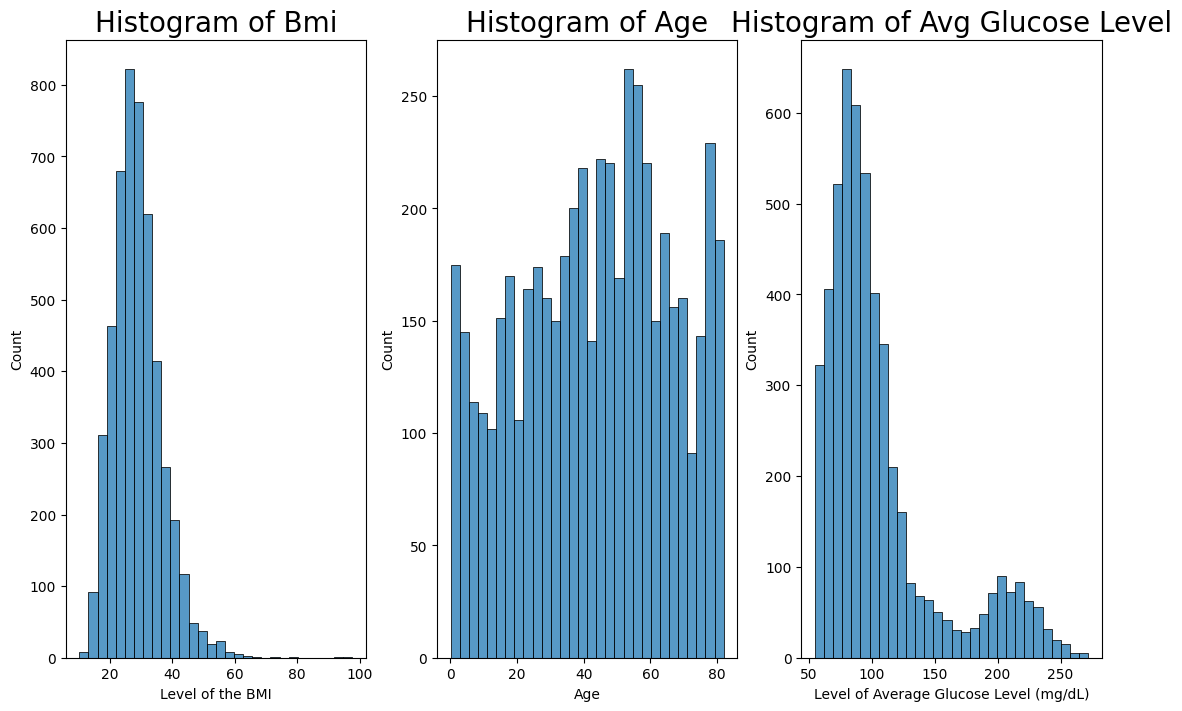

In [ ]:
#12
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Avg Glucose Level',
          xlabel='Level of Average Glucose Level (mg/dL)',
          ax=axes[2])

plt.show()

#**Categorical plot ของ Work type ออกมาเพื่อดูว่า อาชีพไหนมีการเกิด Stroke มากกว่ากัน**

# จะเห็นได้ว่า work_type
- 0 คือ children เกิด stroke 33 คน
- 1 คือ never_worked เกิด stroke 0 คน
- 2 คือ Private เกิด stroke 149 คน
- 3 คือ Self_employed เกิด stroke 65 คน
- 4 คือ Govt_job เกิด stroke 2 คน

เมื่อรวมการเกิด Stroke ทั้งหมด คือ 249 คน

In [ ]:
#13 นับจำนวนและแสดงลักษณะ
work_type_counts = df['work_type'].value_counts()

# แสดงผล
for work_type, count in work_type_counts.items():
    print(f'อาชีพ: {work_type}, จำนวน: {count} คน')

    #0=children
    #1=never_worked
    #2=Private
    #3=Self_employed
    #4=Govt_job


อาชีพ: Private, จำนวน: 2925 คน
อาชีพ: Self-employed, จำนวน: 819 คน
อาชีพ: children, จำนวน: 687 คน
อาชีพ: Govt_job, จำนวน: 657 คน
อาชีพ: Never_worked, จำนวน: 22 คน


In [ ]:
#14 นับจำนวน stroke ตาม work_type
stroke_df = df[df['stroke'] == 1]


stroke_by_work_type = stroke_df.groupby('work_type').size().reset_index(name='stroke_count')

print(stroke_by_work_type)


       work_type  stroke_count
0       Govt_job            33
1        Private           149
2  Self-employed            65
3       children             2


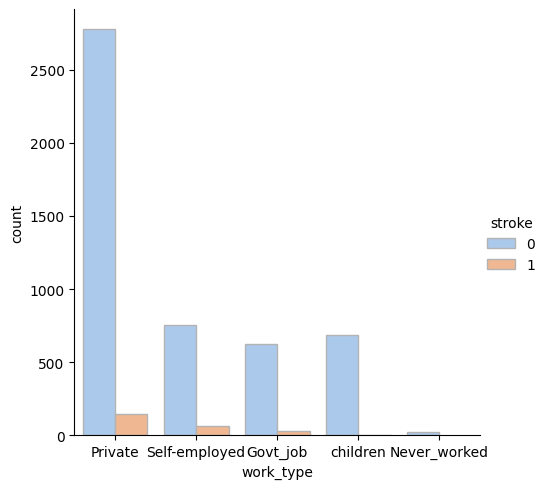

In [ ]:
#15
sns.catplot(x="work_type", hue="stroke", kind="count",palette="pastel", edgecolor=".7",data=df)

# **Categorical plot ของ Smoking Status ออกมาเพื่อดูว่า การสูบบุหรี่มีผลต่อการเกิด Stroke หรือไม่**
Encoding

0 = unknown

1 = formerly smoked (เคยสูบบุหรี่)

2 = never smoked (ไม่เคยสูบบุหรี่)

3 = smokes (สูบเป็นกิจวัตร)

**จะเห็นได้ว่า**
- บุหรี่ไม่น่าจะเกี่ยวอะไรกันกับ Stroke มากนัก เนื่องจากว่ามีอัตราการเกิด Stroke เท่า ๆ กัน

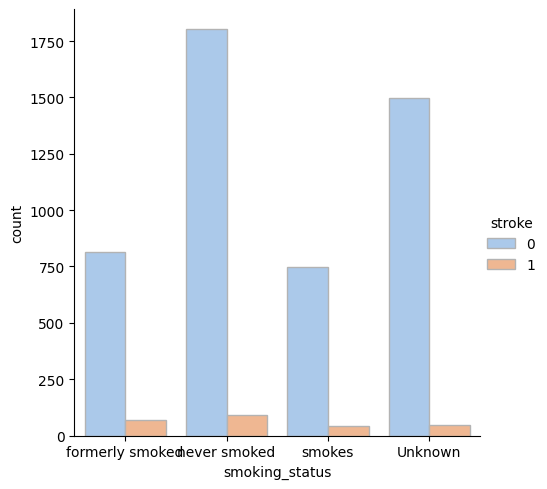

In [ ]:
#16
sns.catplot(x="smoking_status", hue="stroke", kind="count",palette="pastel", edgecolor=".7",data=df)

# Categorical plot เพื่อแสดงค่าของ gender(เพศ)และ Stroke เมื่อเปรัยบเทียบกับ heart_disease(โรคหัวใจ), residence_type(ภูมิลำเนาที่อยู่) และ hypertension(โรคความดัน)
จะสังเกตุเห็นได้ว่า
- เพศ ไม่น่าจะเกี่ยวกับ Stroke
- เพศชายและหญิงมีอัตราการเกิดโรคหัวใจใกล้เคียงกัน
- Hypertension (โรคความดันสูง) โรคความดันสูงมีแนวโน้มส่งเสริมให้เกิด Stroke
- Heart disease (โรคหัวใจ) โรคหัวใจมีแนวโน้มส่งเสริมให้เกิด Stroke


***- อาจพิจารณาได้ว่าโรคความดันสูงและโรคหัวใจเป็นสิ่งที่ส่งเสริมให้เกิด Stroke***

<Axes: xlabel='gender', ylabel='stroke'>

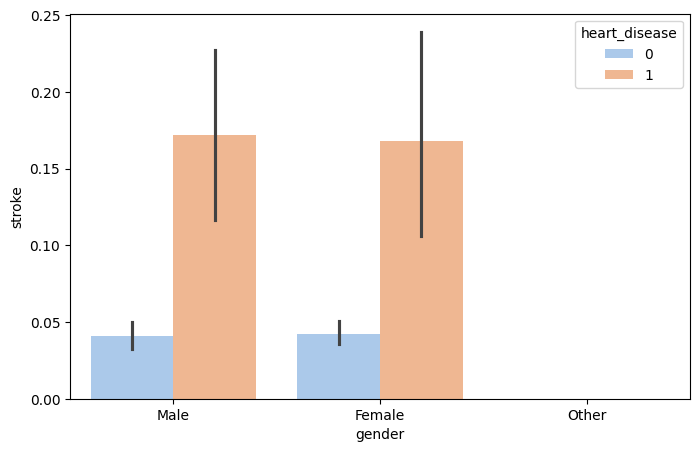

In [ ]:
#17
fig, axes = plt.subplots(1,1, figsize=(8, 5))

sns.barplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", data=df)

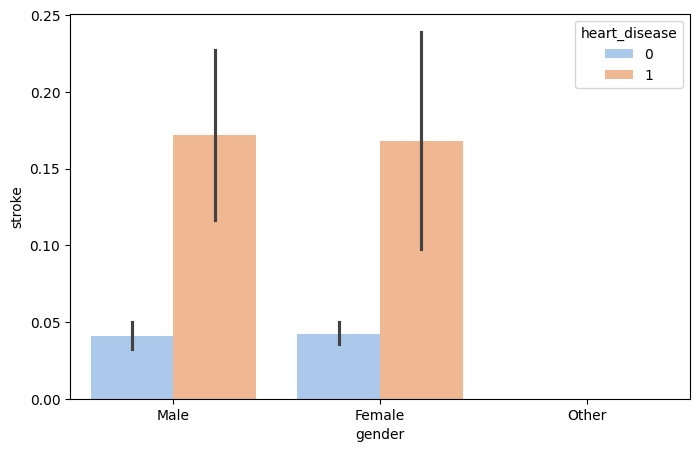

In [ ]:
#18
fig, axes = plt.subplots(1,1, figsize=(8, 5))

sns.barplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", data=df)
# sns.barplot(ax=axes[1], x="gender", y="stroke", hue="Residence_type", palette="pastel", data=df)
# sns.barplot(ax=axes[2], x="gender", y="stroke", hue="hypertension", palette="pastel", data=df)

plt.show()


<Axes: xlabel='gender', ylabel='stroke'>

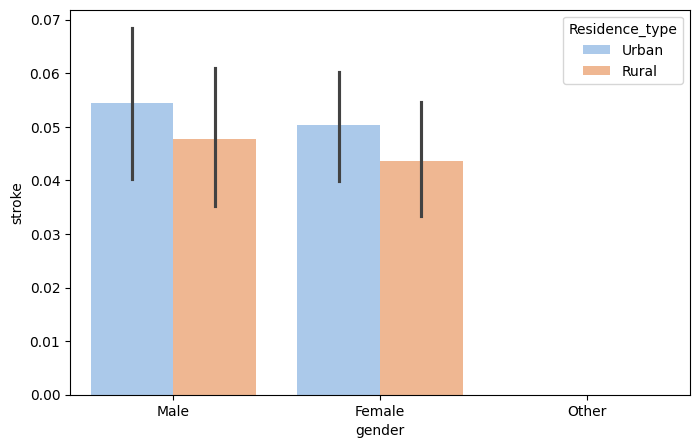

In [ ]:
#19
fig, axes = plt.subplots(1,1, figsize=(8, 5))
sns.barplot( x="gender", y="stroke", hue="Residence_type", palette="pastel", data=df)

<Axes: xlabel='gender', ylabel='stroke'>

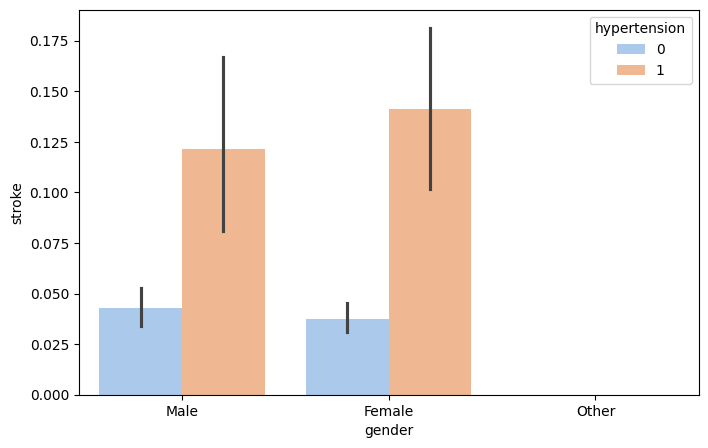

In [ ]:
#20
fig, axes = plt.subplots(1,1, figsize=(8, 5))
sns.barplot( x="gender", y="stroke", hue="hypertension", palette="pastel", data=df)

In [ ]:
#21
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#22
sns.heatmap(df.corr());

ValueError: could not convert string to float: 'Male'

In [ ]:
#23 Correlation with stroke der!
#features คือ นำเข้า column ที่เราต้องการลงไป

features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']


correlation_table = [] #สร้าง list

#for loop นี้จะทำการ corrcoef features ที่เรากำหนด กับ stroke นะ
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict) #เมื่อ loop แล้วเก็บใส่ใน list นี้

dF1 = pd.DataFrame(correlation_table) #create dataframe der!
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')

#ทำการ plot by seaborn
ax = sns.barplot(x="Correlation coefficient", y="Features",
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()


title =  'Correlation Feature w/ Stroke'
sub_title = 'Comparison of categorical features with numerical that correlated to target.'


plt.gcf().text(0.05, 1.02, title, fontsize=24)

from matplotlib.offsetbox import AnchoredText
at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,

                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

In [ ]:
#24 Heatmap Correlation ปกติ
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(), cmap="Blues", annot=True, fmt='.2f');
#25 Heat-Map Correlation แบบใส่เลข

In [ ]:
#26
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features] #features = ตัวแปรอิสระ (Independent Variable)
y = en_df['stroke'] #stroke  = ตัวแปรตาม (Dependent Variable)


forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0) #กำหนดตัวทดลอง n_estimators = 250
forest.fit(X, y) #ให้เรียนรู้จากข้อมูล

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#  feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))




plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

# Fixing Value

In [ ]:
#27
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)

### Balancing Value จาก SMOTE จะเป็นการสร้างข้อมูลเทียม เราใช้เวลาตอนเรามีข้อมูลที่มันไม่ค่อย balance กัน
### สังเกตุจากตอนแรกเรามี stroke =1 = 249 คน แต่หลังจาก SMOTE จะเป็นการสร้างข้อมูลเทียมขึ้นมา
### เพื่อให้ตัว model มันมีตัวอย่างในการ train ขึ้นด้วย

In [ ]:
#28
'''Balancing Value จาก SMOTE จะเป็นการสร้างข้อมูลเทียม เราใช้เวลาตอนเรามีข้อมูลที่มันไม่ค่อย balance กัน
สังเกตุจากตอนแรกเรามี stroke =1 = 249 คน แต่หลังจาก SMOTE จะเป็นการสร้างข้อมูลเทียมขึ้นมา
เพื่อให้ตัว model มันมีตัวอย่างในการ train ขึ้นด้วย'''



from imblearn.over_sampling import SMOTE
X , y = en_df_imputed[features],en_df_imputed["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("ก่อน OverSampling จำนวน Stroke ที่เป็น '1'คือ {}".format(sum(y==1)))
print("ก่อน OverSampling จำนวน Stroke ที่เป็น '0'คือ {} \n".format(sum(y==0)))

print('หลัง OverSampling จำนวน features คือ {}\n'.format(X_res.shape))

print("หลังจาก OverSampling, จำนวนคนที่เป็น Stroke คือ {}".format(sum(y_res==1)))
print("หลังจาก OverSampling, จำนวนคนที่ไม่เป็น Stroke คือ {}".format(sum(y_res==0)))

#ที่คนที่เป็นกับไม่เป็นเท่ากันเพราะเราแก้ imbalance ให้เท่าๆ กัน จะทำให้โมเดลมันวิเคราะห์ง่ายขึ้น

# Modelling

In [ ]:
#29
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x

    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title)

                     )

    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})

    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})



    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)




    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',]

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy()
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [ ]:
#30
def run_exp_on_feature(x_train,y_train,x_test,y_test):

    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))

        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')


    return models_score



In [ ]:
#29
models_score = run_exp_on_feature(x_train,y_train,x_test,y_test)


In [ ]:
#30
hist_score(models_score)
